In [2]:
from db import DB
import pandas as pd

db = DB(filename="/home/pybokeh/Dropbox/data_sets/nba", dbtype="sqlite")

Indexing schema. This will take a second...finished!


In [2]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",999)

In [3]:
db.tables

Refreshing schema. Please wait...done!


Table,Columns
player_game_stats,"id, name_pos, team_name, GP, GS, MIN, PPG, OFFR, DEFR, RPG, APG, SPG, BPG, TPG, FPG, A2TO, PER"
player_shooting_stats,"id, name_pos, team_name, FGM, FGA, FG_Perc, 3PM, 3PA, 3P_Perc, FTM, FTA, FT_Perc, 2PM, 2PA, 2P_Perc, PPS, AFG_Perc"
regular_season_avgs,"id, player_name, season, team, GP, GS, MIN, FGM-A, FG_Perc, 3PM-A, 3P_Perc, FTM-A, FT_Perc, OR, DR, REB, AST, BLK, STL, PF, TO, PTS"
regular_season_misc_totals,"id, player_name, season, team, DBLDBL, TRIDBL, DQ, EJECT, TECH, FLAG, AST2TO, STL2TO, RAT, SCEFF, SHEFF"
regular_season_totals,"id, player_name, season, team, FGM-A, FG_Perc, 3PM-A, 3P_Perc, FTM-A, FT_Perc, OR, DR, REB, AST, BLK, STL, PF, TO, PTS"


In [4]:
sql = """
select
team.name_pos as name,
avgs.season as season,
avgs.fg_perc as fg_perc

from regular_season_avgs avgs

inner join 

(select
id,
name_pos

from player_game_stats

where
team_name like '%Cav%') as team
on team.id = avgs.id

where
not(season like '%14-''15%')

order by
team.name_pos,
avgs.season
"""

In [8]:
df = db.query(sql)
df

,name,season,fg_perc
0,"A.J. Price, PG†",'09-'10,0.410
1,"A.J. Price, PG†",'10-'11,0.356
2,"A.J. Price, PG†",'11-'12,0.339
3,"A.J. Price, PG†",'12-'13,0.390
4,"A.J. Price, PG†",'13-'14,0.413
5,"Anderson Varejao, C",'04-'05,0.513
6,"Anderson Varejao, C",'05-'06,0.527
7,"Anderson Varejao, C",'06-'07,0.476
8,"Anderson Varejao, C",'07-'08,0.461
9,"Anderson Varejao, C",'08-'09,0.536


### I want to plot FG (field goal) percentage for all Cavs players.  But for the x-axis, I need to create a variable that represents season number.  The tricky part is coming up with a way to reset the season number back to 1 when we run into a different player.  Below is a something I hacked up to reset the dataframe index back to 1 with each new player.

In [142]:
grouped = df['name'].value_counts()
grouped = grouped.sort_index()
new_index_list = [[value for value in range(1,index+1)] for index in grouped.values]

new_index = []
for mylist in new_index_list:
    new_index = new_index + mylist

df.index = new_index
df

,name,season,fg_perc
1,"A.J. Price, PG†",'09-'10,0.410
2,"A.J. Price, PG†",'10-'11,0.356
3,"A.J. Price, PG†",'11-'12,0.339
4,"A.J. Price, PG†",'12-'13,0.390
5,"A.J. Price, PG†",'13-'14,0.413
1,"Anderson Varejao, C",'04-'05,0.513
2,"Anderson Varejao, C",'05-'06,0.527
3,"Anderson Varejao, C",'06-'07,0.476
4,"Anderson Varejao, C",'07-'08,0.461
5,"Anderson Varejao, C",'08-'09,0.536


### As you can see from above, it worked.  But the problem is, I need to convert the dataframe index to an actual column.  The reason being, I will be using ggplot to plot my data, and ggplot expects x-axis values to be derived from an actual column, not from the dataframe index.  I can use the reset_index() method to convert the index to an actual column.

In [143]:
df.reset_index(level=0, inplace=True)
df.rename(columns={'index':'season_num'}, inplace=True)
df

,season_num,name,season,fg_perc
0,1,"A.J. Price, PG†",'09-'10,0.410
1,2,"A.J. Price, PG†",'10-'11,0.356
2,3,"A.J. Price, PG†",'11-'12,0.339
3,4,"A.J. Price, PG†",'12-'13,0.390
4,5,"A.J. Price, PG†",'13-'14,0.413
5,1,"Anderson Varejao, C",'04-'05,0.513
6,2,"Anderson Varejao, C",'05-'06,0.527
7,3,"Anderson Varejao, C",'06-'07,0.476
8,4,"Anderson Varejao, C",'07-'08,0.461
9,5,"Anderson Varejao, C",'08-'09,0.536


### With the data finally properly formatted, we can begin charting!

In [144]:
from ggplot import *

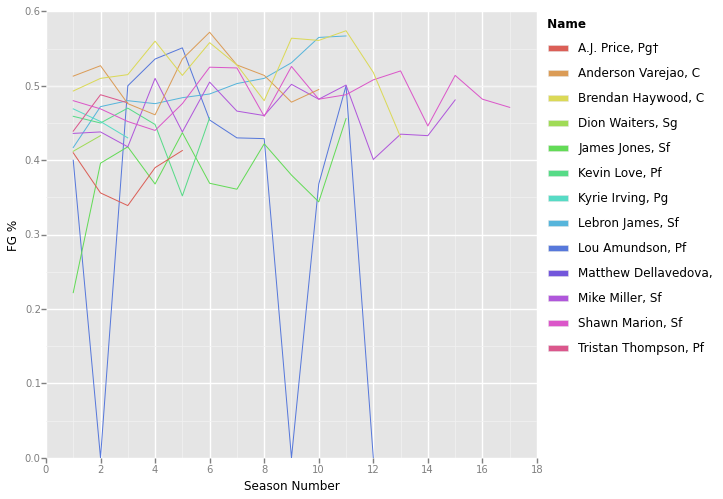

<ggplot: (-895546348)>

In [145]:
ggplot(df, aes(x='season_num', y='fg_perc', color='name')) + \
    ylab("FG %") + \
    xlab("Season Number") + \
    geom_line()

### As you can see from the chart above, things got too busy.  So we'll just chart individual players.

In [93]:
criteria = df['name'].str.contains('LeBron')
lebron = df[criteria]
lebron

,season_num,name,season,fg_perc
50,1,"LeBron James, SF",'03-'04,0.417
51,2,"LeBron James, SF",'04-'05,0.472
52,3,"LeBron James, SF",'05-'06,0.480
53,4,"LeBron James, SF",'06-'07,0.476
54,5,"LeBron James, SF",'07-'08,0.484
55,6,"LeBron James, SF",'08-'09,0.489
56,7,"LeBron James, SF",'09-'10,0.503
57,8,"LeBron James, SF",'10-'11,0.510
58,9,"LeBron James, SF",'11-'12,0.531
59,10,"LeBron James, SF",'12-'13,0.565


In [94]:
criteria = df['name'].str.contains('Varejao')
av = df[criteria]
av.index = range(len(av))
av

,season_num,name,season,fg_perc
0,1,"Anderson Varejao, C",'04-'05,0.513
1,2,"Anderson Varejao, C",'05-'06,0.527
2,3,"Anderson Varejao, C",'06-'07,0.476
3,4,"Anderson Varejao, C",'07-'08,0.461
4,5,"Anderson Varejao, C",'08-'09,0.536
5,6,"Anderson Varejao, C",'09-'10,0.572
6,7,"Anderson Varejao, C",'10-'11,0.528
7,8,"Anderson Varejao, C",'11-'12,0.514
8,9,"Anderson Varejao, C",'12-'13,0.478
9,10,"Anderson Varejao, C",'13-'14,0.495


In [96]:
criteria = df['name'].str.contains('Haywood')
bh = df[criteria]
bh

,season_num,name,season,fg_perc
15,1,"Brendan Haywood, C",'01-'02,0.493
16,2,"Brendan Haywood, C",'02-'03,0.510
17,3,"Brendan Haywood, C",'03-'04,0.515
18,4,"Brendan Haywood, C",'04-'05,0.560
19,5,"Brendan Haywood, C",'05-'06,0.514
20,6,"Brendan Haywood, C",'06-'07,0.558
21,7,"Brendan Haywood, C",'07-'08,0.528
22,8,"Brendan Haywood, C",'08-'09,0.480
23,9,"Brendan Haywood, C",'09-'10,0.564
24,10,"Brendan Haywood, C",'09-'10,0.561


In [95]:
ggplot(lebron, aes(x='season_num', y='fg_perc', color='name')) + \
    geom_line()

<repr(<ggplot.ggplot.ggplot at 0xac6e038c>) failed: KeyError: 0>

### Found out there is a [bug](https://github.com/yhat/ggplot/pull/3840) in ggplot where if the index of the data frame doesn't start with a 0, you get the KeyError.

As a workaround until that bug is fixed is to use the reset_index() method with drop=True, to "drop" the original index and then go ahead and create a new index.

In [107]:
lebron = lebron.reset_index(drop=True)
lebron

,season_num,name,season,fg_perc
0,1,"LeBron James, SF",'03-'04,0.417
1,2,"LeBron James, SF",'04-'05,0.472
2,3,"LeBron James, SF",'05-'06,0.480
3,4,"LeBron James, SF",'06-'07,0.476
4,5,"LeBron James, SF",'07-'08,0.484
5,6,"LeBron James, SF",'08-'09,0.489
6,7,"LeBron James, SF",'09-'10,0.503
7,8,"LeBron James, SF",'10-'11,0.510
8,9,"LeBron James, SF",'11-'12,0.531
9,10,"LeBron James, SF",'12-'13,0.565


### Now that my lebron dataframe has an index that starts with zero, we can plot the data finally.

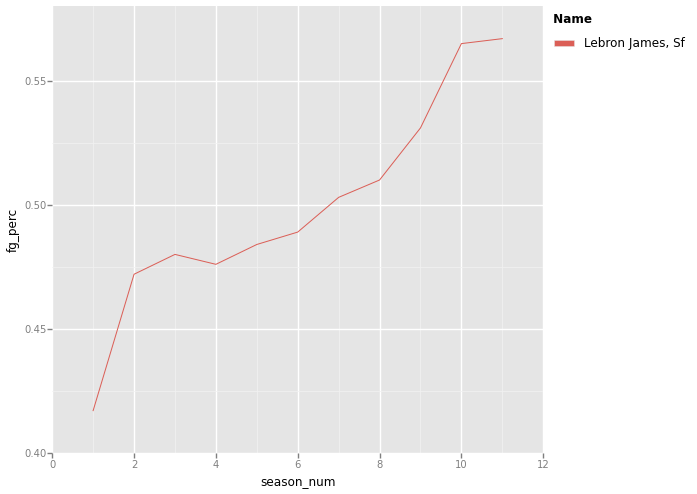

<ggplot: (-892905648)>

In [100]:
ggplot(lebron, aes(x='season_num', y='fg_perc', color='name')) + \
    geom_line()

In [101]:
criteria = df['name'].str.contains('Haywood')
bh = df[criteria]
bh = bh.reset_index(drop=True)
bh

,season_num,name,season,fg_perc
0,1,"Brendan Haywood, C",'01-'02,0.493
1,2,"Brendan Haywood, C",'02-'03,0.510
2,3,"Brendan Haywood, C",'03-'04,0.515
3,4,"Brendan Haywood, C",'04-'05,0.560
4,5,"Brendan Haywood, C",'05-'06,0.514
5,6,"Brendan Haywood, C",'06-'07,0.558
6,7,"Brendan Haywood, C",'07-'08,0.528
7,8,"Brendan Haywood, C",'08-'09,0.480
8,9,"Brendan Haywood, C",'09-'10,0.564
9,10,"Brendan Haywood, C",'09-'10,0.561


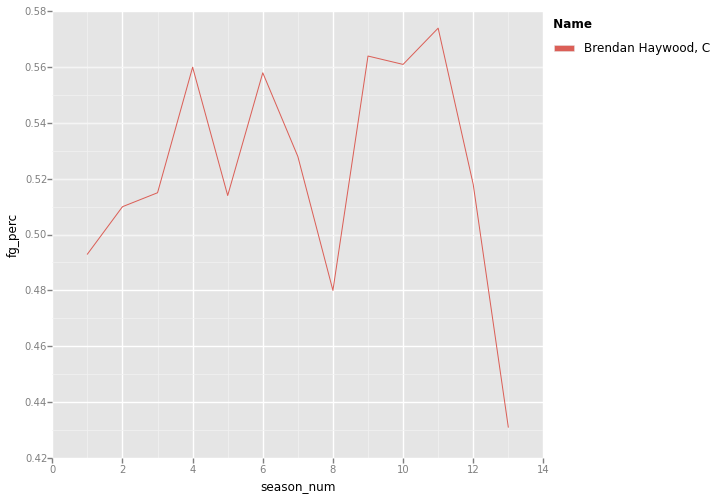

<ggplot: (-892826902)>

In [104]:
ggplot(bh, aes(x='season_num', y='fg_perc', color='name')) + \
    geom_line()

In [110]:
criteria = df['name'].str.contains('Varejao')
av = df[criteria]
av = av.reset_index(drop=True)
av

,season_num,name,season,fg_perc
0,1,"Anderson Varejao, C",'04-'05,0.513
1,2,"Anderson Varejao, C",'05-'06,0.527
2,3,"Anderson Varejao, C",'06-'07,0.476
3,4,"Anderson Varejao, C",'07-'08,0.461
4,5,"Anderson Varejao, C",'08-'09,0.536
5,6,"Anderson Varejao, C",'09-'10,0.572
6,7,"Anderson Varejao, C",'10-'11,0.528
7,8,"Anderson Varejao, C",'11-'12,0.514
8,9,"Anderson Varejao, C",'12-'13,0.478
9,10,"Anderson Varejao, C",'13-'14,0.495


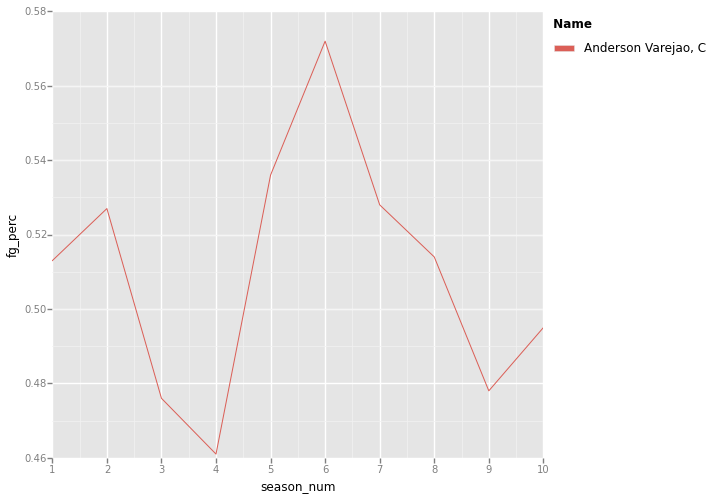

<ggplot: (-892823472)>

In [106]:
ggplot(av, aes(x='season_num', y='fg_perc', color='name')) + \
    geom_line()